# Mock CEO-Request

## ❓ **How could Olist improve its profit** ❓

### Assuming the following:

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that "Olist has a lower IT Cost with few sellers selling a lot of products rather than the opposite  
- with **1000 sellers** and a total of **100 products** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 products** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

## 2. Should Olist remove under-performing sellers from its marketplace?

**What would have happened if Olist had never accepted these sellers in the first place?**  


### 2.1 Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



In [2]:
from olist_data.seller import Seller
from olist_data.product import Product
from olist_data.order import Order
from olist_data.data import Olist

In [3]:
olist = Olist()
data = olist.get_data()

In [4]:
sellers = Seller().get_training_data()
sellers

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


## Creating Theoretical IT Costs

In [5]:
sellers.sort_values(by='profits')

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.124729,0.514100,3.937093,35290,1854,2033,1.096548,123304.83,13770.483,-21519.517
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.143809,0.482510,3.827873,39400,1806,1987,1.100221,200472.92,21647.292,-17752.708
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,0.116092,0.584483,4.077586,29530,1706,1775,1.040445,104288.42,11948.842,-17581.158
945,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,0.113935,0.527607,3.997371,20220,1146,1203,1.049738,37177.52,4677.752,-15542.248
315,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,0.118211,0.568690,4.074547,15440,943,1018,1.079533,17535.69,2553.569,-12886.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,46dc3b2cc0980fb8ec44634e21d2718e,rio de janeiro,RJ,0.0,11.800424,2016-10-06 15:44:00,2018-08-17 22:49:38,22.0,0.112621,0.629126,4.194175,7500,521,542,1.040307,128111.19,14571.119,7071.119
2151,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,0.0,11.709806,2017-09-30 09:49:22,2018-08-20 19:30:10,11.0,0.066265,0.692771,4.421687,1520,166,175,1.054217,79284.55,8808.455,7288.455
534,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,0.0,13.341871,2017-01-07 20:55:10,2018-08-29 10:04:16,20.0,0.086059,0.676420,4.339071,6510,585,586,1.001709,194042.03,21004.203,14494.203
67,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,0.0,11.335141,2016-10-08 03:19:09,2018-07-14 21:25:19,21.0,0.101493,0.629851,4.214925,4700,336,340,1.011905,176431.87,19323.187,14623.187


In [6]:
n_sellers = 2967
n_products = 31484 

a=3157.27
b=978.23


In [7]:
IT_costs = a*np.sqrt(2967) + b*np.sqrt(31484)
IT_costs

345551.5530230932

## Identifying Poor Performing Sellers

Compute, for each `seller_id`
- the `revenues` it brings
- the `review_costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)

In [8]:
def how_many_to_drop(num_to_drop):
    a=3157.27
    b=978.23
    
    #Sort sellers by profit
    sellers = Seller().get_training_data()
    sorted_sellers = sellers.sort_values(by='profits')
    
    revenue_dict = {}
    
    current_rev = sellers['profits'].sum() - (a*np.sqrt(len(sellers)) + b*np.sqrt(sellers['quantity'].sum()))

    revenue_dict[0] = current_rev

    #remove sellers with lowest profit one by one
    for seller_to_remove in range(1, num_to_drop):
        
        dropped_sellers = sorted_sellers.drop(sorted_sellers.head(seller_to_remove).index)
        n_sellers = len(dropped_sellers)
        
        n_products = dropped_sellers['quantity'].sum()
        
        IT_cost = a*np.sqrt(n_sellers) + b*np.sqrt(n_products)
        total_profit = dropped_sellers['profits'].sum()
        revenue = total_profit - IT_cost
        
        revenue_dict[seller_to_remove] = revenue

    sns.lineplot(x=revenue_dict.keys(), y=revenue_dict.values())
    plt.show()
    
    return revenue_dict
    

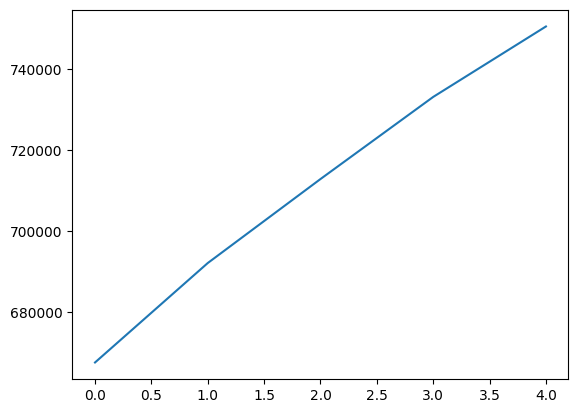

In [9]:
five_rev = how_many_to_drop(5)

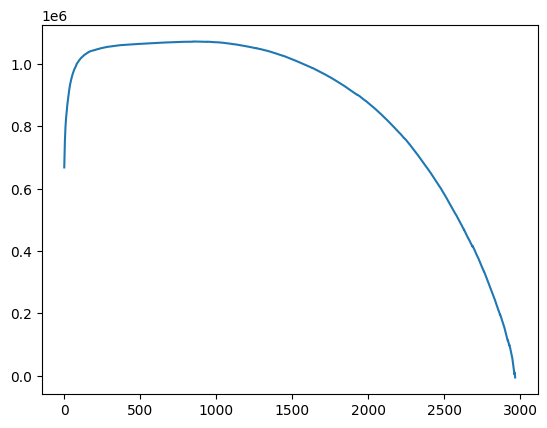

In [10]:
all_rev = how_many_to_drop(2967)

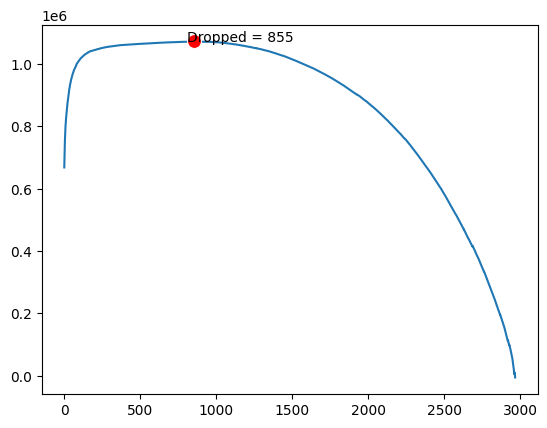

In [11]:
#Find optimal number of sellers to remove
max_val = max(all_rev.values())
max_key = max(all_rev, key=all_rev.get)
current_rev = sellers['profits'].sum() - (a*np.sqrt(len(sellers)) + b*np.sqrt(sellers['quantity'].sum()))
sns.lineplot(x=all_rev.keys(), y=all_rev.values())
plt.annotate(f"Dropped = {max_key}", (max_key-50,max_val-1000))
# plt.annotate(f"increase = {round(max_val-current_rev, 2)} BRL", (max_key-65,max_val-2000))
sns.lineplot(x={'max': max_key}, y={'max': max_val}, marker='o', markersize=10, markerfacecolor='red')
plt.show()

## 3. Investigating Average Profit by State

In [12]:
sellers.keys()

Index(['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier',
       'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist',
       'share_of_one_stars', 'share_of_five_stars', 'review_score',
       'cost_of_reviews', 'n_orders', 'quantity', 'quantity_per_order',
       'sales', 'revenues', 'profits'],
      dtype='object')

In [13]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [14]:
orders = Order().get_training_data()

In [15]:
data['geolocation']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [16]:
orders_sellers = orders.merge(data['order_items'], how='inner', on='order_id').merge(data['sellers'], how='inner', on='seller_id').merge(data['geolocation'], how='inner', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
orders_sellers.keys()

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price_x', 'freight_value_x',
       'distance_seller_customer', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price_y', 'freight_value_y',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [17]:
sellers_geo = orders_sellers.groupby('seller_id', as_index=False).agg(avg_dist_to_cust=('distance_seller_customer', 'mean'), lat=('geolocation_lat', 'mean'), lon=('geolocation_lng', 'mean'))

In [18]:
sellers_geo_fin = sellers_geo.merge(sellers, how='inner', on='seller_id')
sellers_geo_fin

,seller_id,avg_dist_to_cust,lat,lon,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,...,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,0015a82c2db000af6aaaf3ae2ecb0532,605.178732,-23.640444,-46.541742,santo andre,SP,0.000000,10.793885,2017-09-27 22:24:16,2017-10-18 23:56:20,...,0.333333,0.666667,3.666667,100,3,3,1.000000,2685.00,348.500,248.500
1,001cca7ae9ae17fb1caed9dfb1094831,817.377899,-20.278513,-40.411675,cariacica,ES,0.000000,13.096632,2017-02-04 19:15:39,2018-07-12 21:50:17,...,0.121827,0.527919,3.984772,3560,200,239,1.195000,25080.03,3868.003,308.003
2,002100f778ceb8431b7a1020ff7ab48f,516.226809,-20.528759,-47.411110,franca,SP,0.000000,16.192371,2017-09-14 01:10:15,2018-04-12 13:11:45,...,0.134615,0.519231,3.903846,1110,51,55,1.078431,1234.50,683.450,-426.550
3,003554e2dce176b5555353e4f3555ac8,938.489608,-16.640574,-49.276483,goiania,GO,0.000000,4.646806,2017-12-15 07:11:03,2017-12-15 07:11:03,...,0.000000,1.000000,5.000000,0,1,1,1.000000,120.00,12.000,12.000
4,004c9cd9d87a3c30c522c48c4fc07416,625.806400,-21.757321,-48.829744,ibitinga,SP,0.000000,14.430364,2017-01-28 02:32:27,2018-05-05 10:15:17,...,0.080745,0.596273,4.136646,2430,158,170,1.075949,19712.71,3171.271,741.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,ffc470761de7d0232558ba5e786e57b7,603.009770,-23.464178,-46.539335,guarulhos,SP,0.000000,10.081843,2018-02-20 19:00:35,2018-08-21 04:29:47,...,0.037037,0.703704,4.444444,260,28,31,1.107143,1649.01,644.901,384.901
2954,ffdd9f82b9a447f6f8d4b91554cc7dd3,445.758642,-25.417039,-49.260760,curitiba,PR,0.000000,10.324113,2017-03-05 16:30:20,2018-08-20 12:11:53,...,0.055556,0.666667,4.333333,190,18,20,1.111111,2101.20,1650.120,1460.120
2955,ffeee66ac5d5a62fe688b9d26f83f534,715.015888,-20.814772,-49.506928,mirassol,SP,0.730856,18.074881,2017-09-30 16:14:11,2018-05-16 03:33:54,...,0.142857,0.642857,4.214286,200,14,14,1.000000,1839.86,743.986,543.986
2956,fffd5413c0700ac820c7069d66d98c89,583.671371,-22.721605,-46.844150,amparo,SP,0.000000,13.744653,2017-07-24 21:25:19,2018-08-26 20:10:15,...,0.186441,0.542373,3.847458,1360,60,61,1.016667,9062.30,1946.230,586.230


In [19]:
coord = sellers_geo_fin[['lat', 'lon', 'profits', 'wait_time', 'seller_state']]
coord[coord['seller_state']=='BA']

,lat,lon,profits,wait_time,seller_state
233,-12.893167,-38.337875,174.900,10.394942,BA
493,-11.304164,-41.855805,29.989,6.000301,BA
655,-12.988919,-38.488110,14.590,7.091377,BA
763,-9.404468,-38.222337,244.950,16.569190,BA
783,-11.769488,-41.901853,2.390,27.334259,BA
857,-16.400187,-39.262747,1619.587,16.728475,BA
922,-12.253206,-38.967644,243.000,66.754657,BA
975,-12.893167,-38.337875,18067.605,13.374429,BA
1177,-12.154534,-39.740461,19.990,11.765197,BA
1187,-16.375216,-39.587551,968.680,9.770508,BA


In [20]:
profits_state = coord.groupby('seller_state').agg(profit_by_state=('profits', 'mean'))

In [21]:
import geopandas as gpd

In [22]:
brazil = gpd.read_file('data/brazil.gpkg')

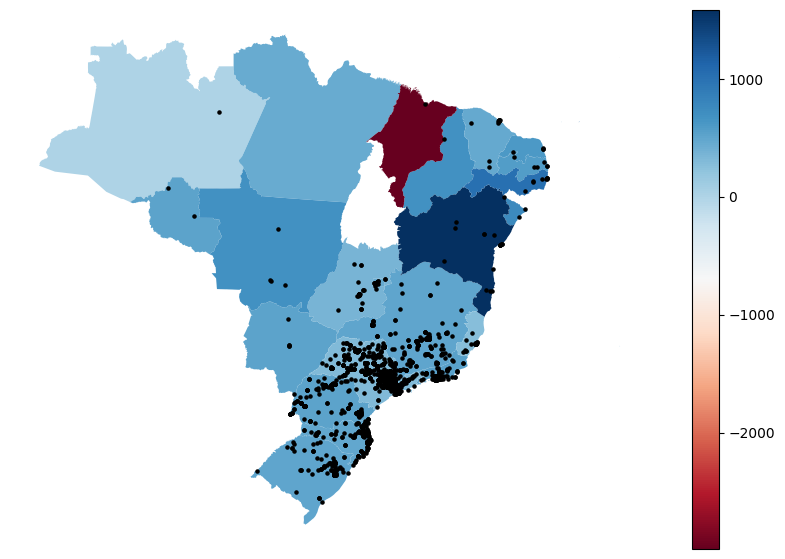

In [23]:
import warnings
warnings.filterwarnings('ignore')

brazil.rename({"sigla": 'seller_state'}, axis=1, inplace=True)
brazil_prof = brazil.merge(profits_state, on='seller_state', how='left')
brazil_prof = brazil_prof[['seller_state', 'profit_by_state', 'geometry']]
brazil_prof['center_x'] = brazil_prof['geometry'].map(lambda c: c.centroid.x)
brazil_prof['center_y'] = brazil_prof['geometry'].map(lambda c: c.centroid.y)

fig, ax = plt.subplots(figsize=(11,7))

brazil_prof.plot(column = "profit_by_state",
                   cmap='RdBu',
                   legend=True, 
                   ax=ax,
                   label='Average profit per state')
coord.plot(ax = ax, x='lon', y='lat', marker = '.', color = "black", kind='scatter', cmap='RdBu')
ax.set_axis_off()
plt.show()

In [24]:
brazil[brazil['seller_state']=='BA']

,nome,seller_state,geocodigo,geometry
20,Bahia,BA,29,"MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ..."
